# RTT Scoring
<div>
    <p style="float: left;"><img src="images/gambling_task.png" alt="Drawing" style="width: 200px; border-right:30px solid white"/>
    <ol style="padding-left:240px">
        <li>Participants chose between gambles and certain choices.</li>
        <li>Three trial types:
            <ul>
                <li>Win/nothing vs. certain win (win trials)</li>
                <li>Loss/nothing vs. certain loss (loss trials)</li>
                <li>Win/loss vs. nothing (mixed trials)</li>
            </ul>
        </li>
        <li>For each type, we calculate the percentage gambles.</li>
    </ol>

</div>

In [ ]:
# Running the init notebook
import dotenv
import pytest
init_notebook_path = dotenv.dotenv_values()['INIT_NOTEBOOK_PATH']
%run $init_notebook_path
# Other imports
%reload_ext rpy2.ipython
from wp1 import stats, plotting, data_provider as dp # This is the local wp1 package in analysis/src
from wp1.utils import display_function
from scipy.stats import pearsonr

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
%%capture
%%R
library(lme4)
library(lmerTest)
library(ggeffects)
control=glmerControl(optimizer = "bobyqa", optCtrl=list(maxfun=1e5))  #mixed logistic regression

In [ ]:
dp = reload(dp)
rtt_data_getter = dp.get_initial_rtt_data
session_data_getter = lambda columns = []: dp.get_gbe_baseline_data(columns = ['initial'] + columns).query('initial').loc[sst_data_getter().gbe_baseline_index.unique()]

For win trials, there was a correlation of r = .058 (p = .177) between gamble_advantage and percent gambles.


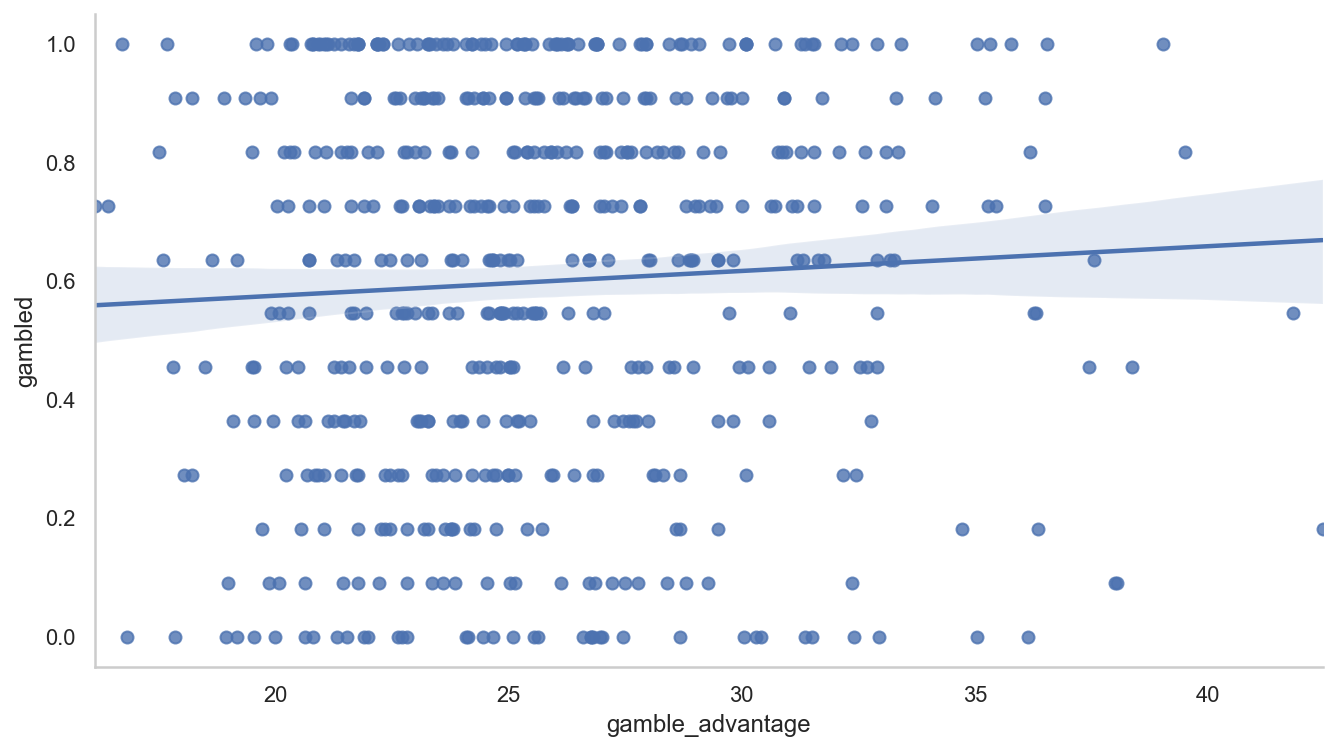

For loss trials, there was a correlation of r = .107 (p = .012) between gamble_advantage and percent gambles.


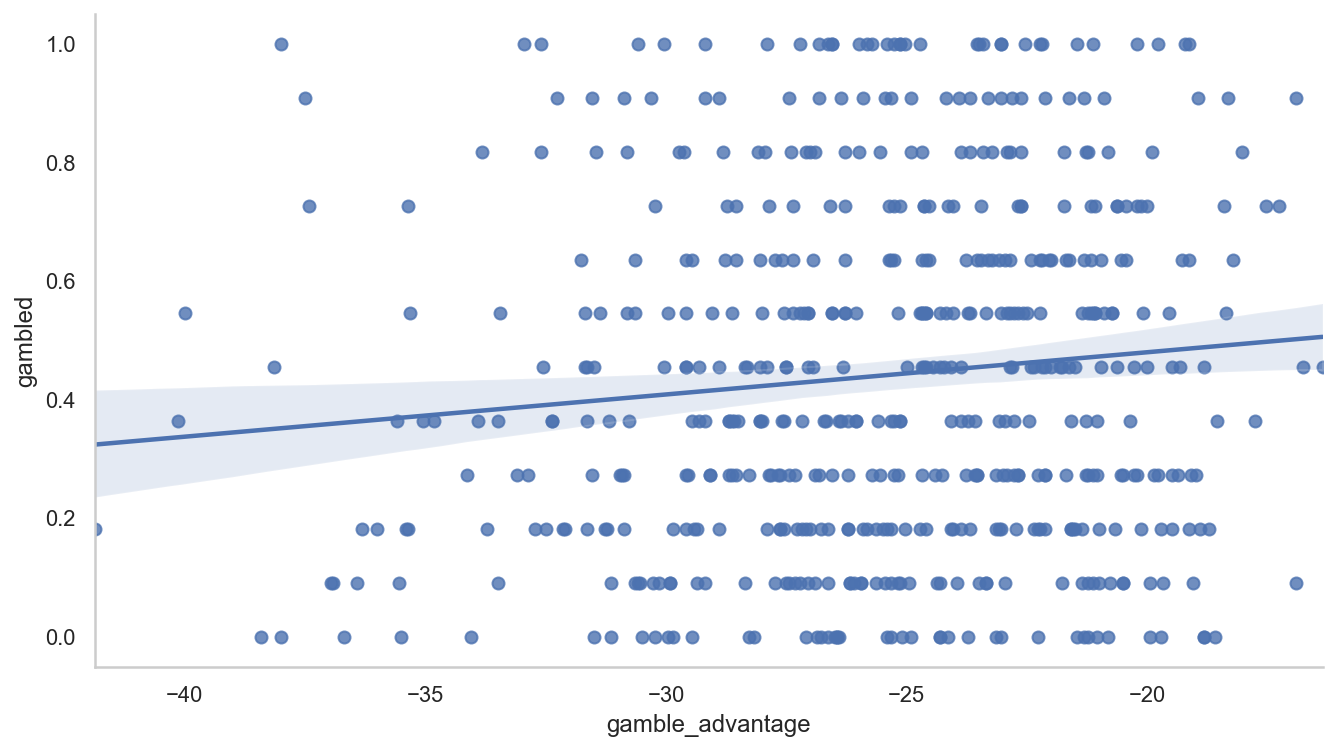

For mixed trials, there was a correlation of r = .205 (p = .000) between gamble_advantage and percent gambles.


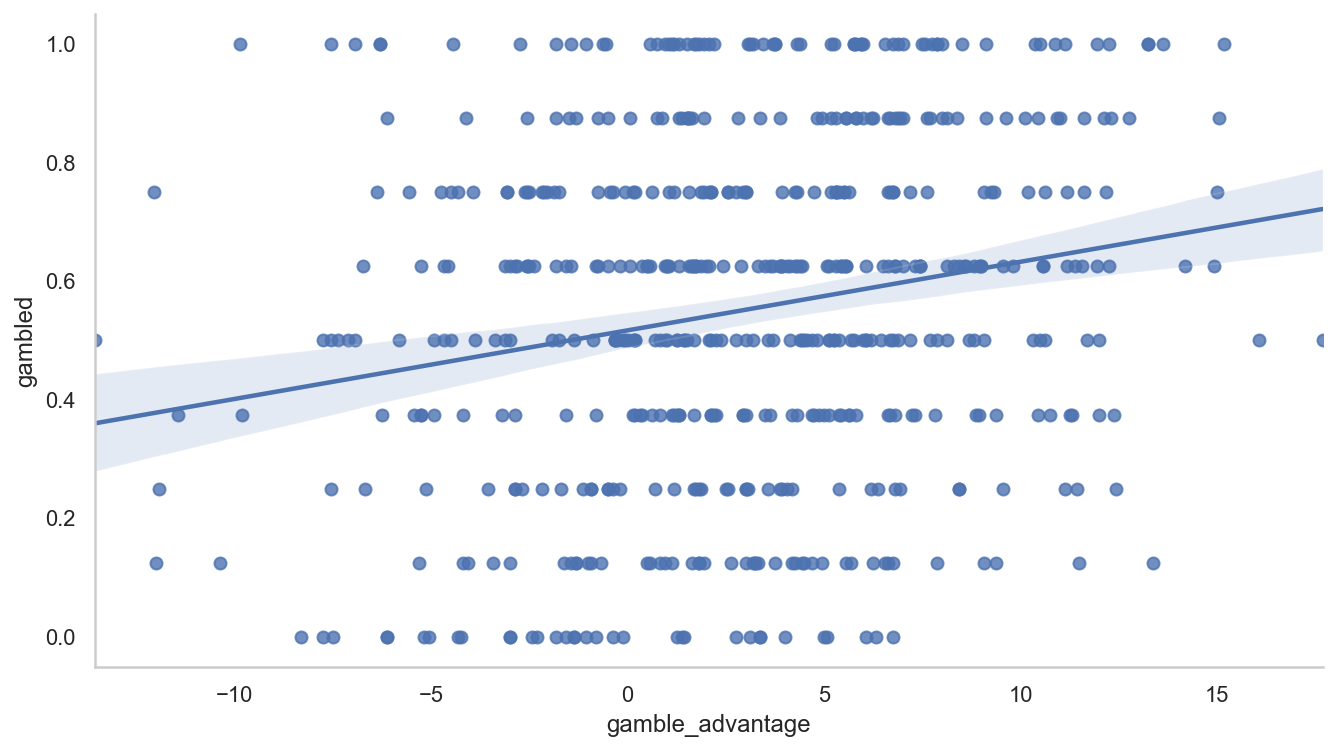

In [ ]:
def check_risk_advantage_choice_correlation():
    df = rtt_data_getter()
    df['gamble_advantage'] =  ((df.spinnerloseamount.astype(int) + df.spinnerwinamount.astype(int) - df.choiceamount.astype(int))/2)
    df = df.groupby(["participant","baseline_session","trial_type"])[['gamble_advantage','gambled']].mean()
    for trial_type in ['win','loss','mixed']:
        sns.regplot(x = 'gamble_advantage', y = 'gambled', data = df.query('trial_type=="%s"'%trial_type))
        corr = pearsonr(df.query('trial_type=="%s"'%trial_type)['gamble_advantage'],df.query('trial_type=="%s"'%trial_type)['gambled'])
        print(("For %s trials, there was a correlation of r = %.3f (p = %.3f) between gamble_advantage and percent gambles."%(trial_type, corr[0], corr[1])).replace('0.','.'))
        sns.despine()
        plt.show()
check_risk_advantage_choice_correlation()